# Diabetes Prediction Project
This project aims to predict diabetes using a machine learning model. The dataset is preprocessed and a predictive model is trained and evaluated for accuracy.


**Import libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Load dataset**

In [6]:
data = pd.read_csv('Pima_Indians_Diabetes_Database.csv')

**Data exploration and preprocessing**

In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
data.isnull().sum()                                                  #Checking and handling missing values
data.fillna(data.mean(), inplace=True)

**Data normalization/scaling**

In [16]:
scaler = StandardScaler()
scaled_data =scaler.fit_transform(data.drop('Outcome', axis=1))

**Train-Test Split**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    scaled_data, data['Outcome'], test_size=0.2, random_state=42
)

**Model Training**

In [21]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

 **Model Evaluation**

In [24]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7272727272727273
Confusion Matrix:
 [[78 21]
 [21 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



**Visualization**

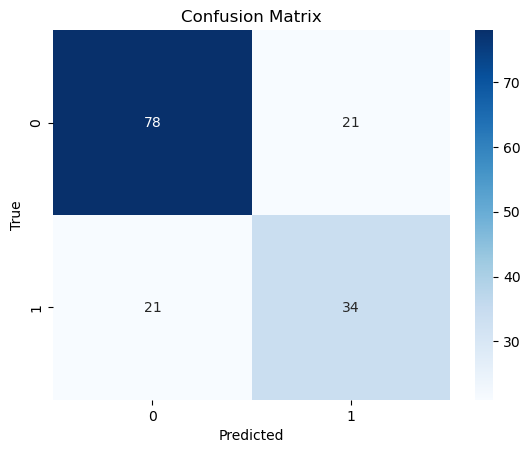

In [26]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

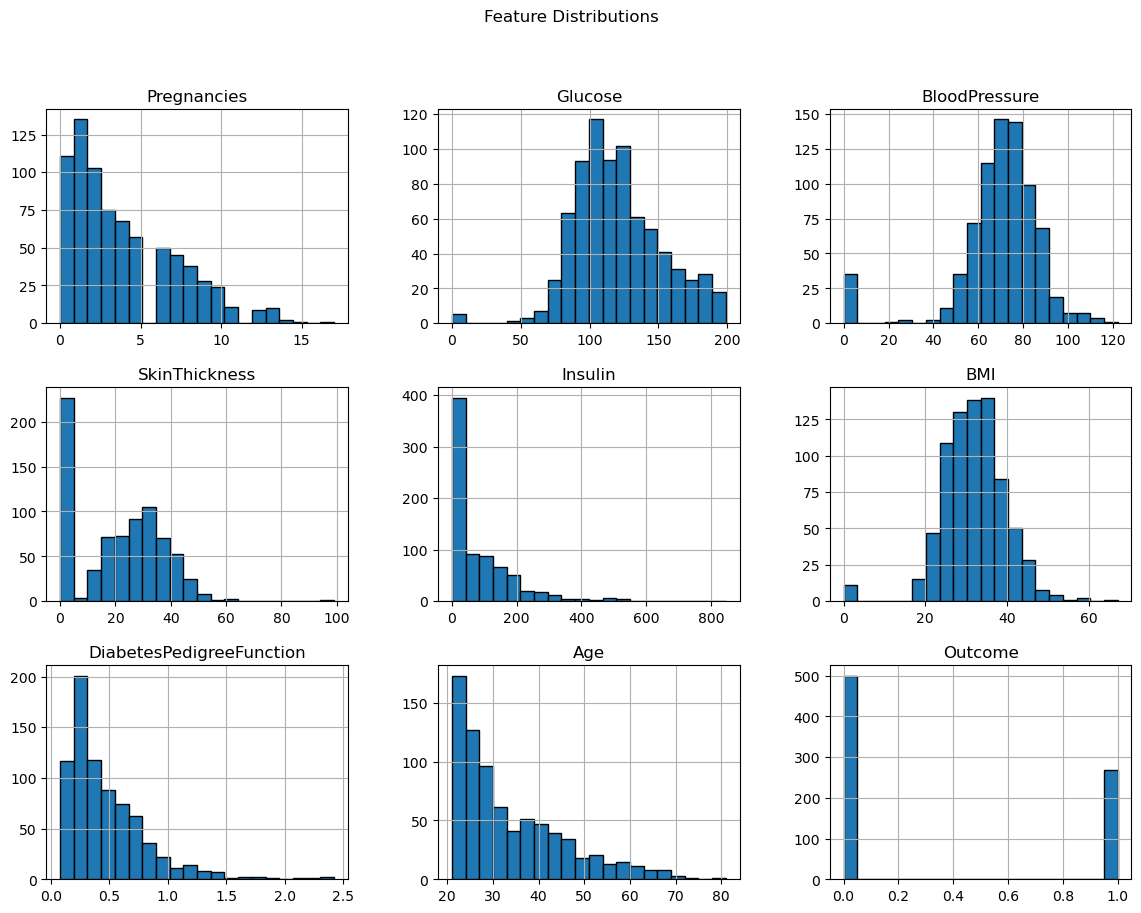

In [28]:
#Histogram

data.hist(bins=20, figsize=(14, 10), edgecolor='k')
plt.suptitle('Feature Distributions')
plt.show()

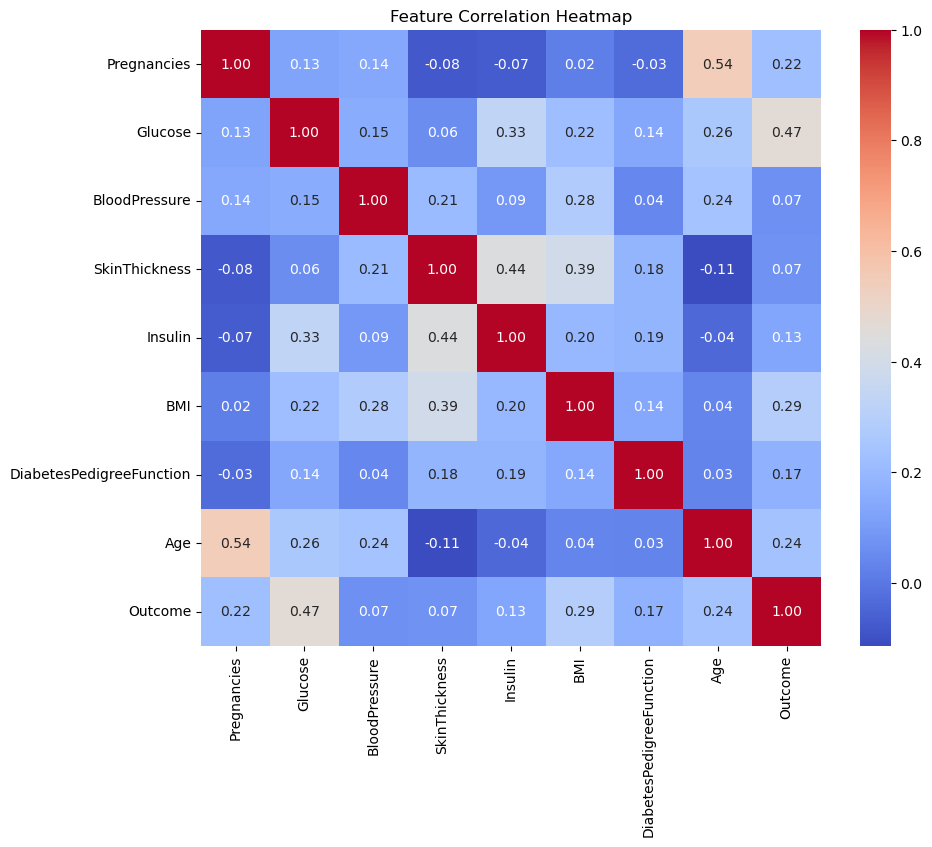

In [30]:
#Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

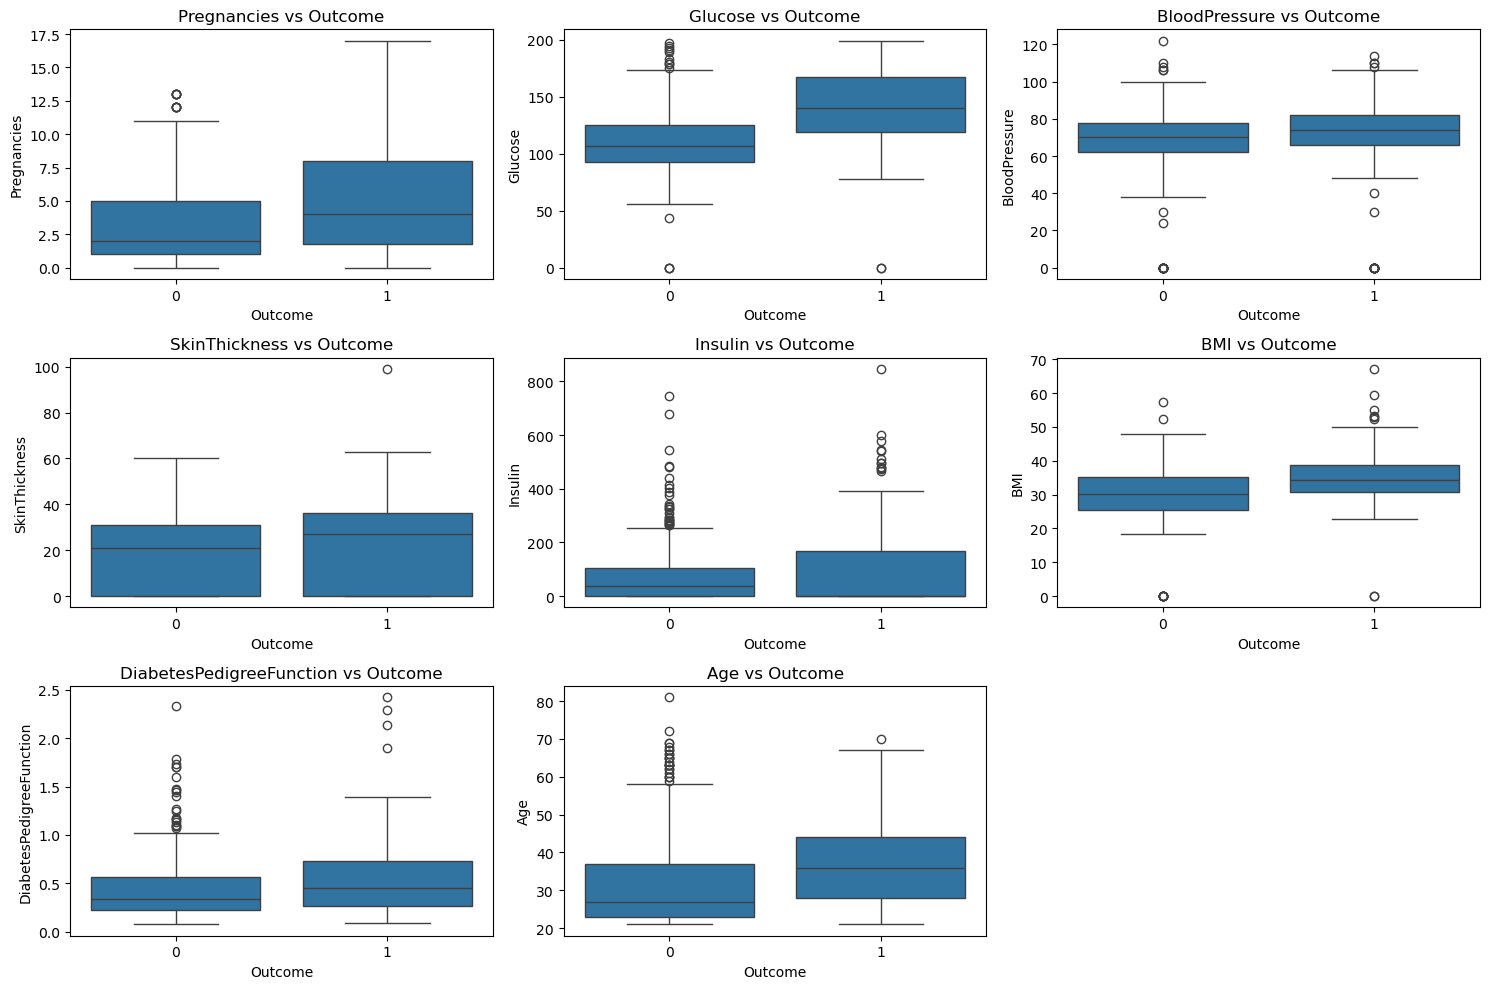

In [32]:
#Box Plot
feature_columns = data.columns[:-1]
plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Outcome', y=feature, data=data)
    plt.title(f'{feature} vs Outcome')
plt.tight_layout()
plt.show()

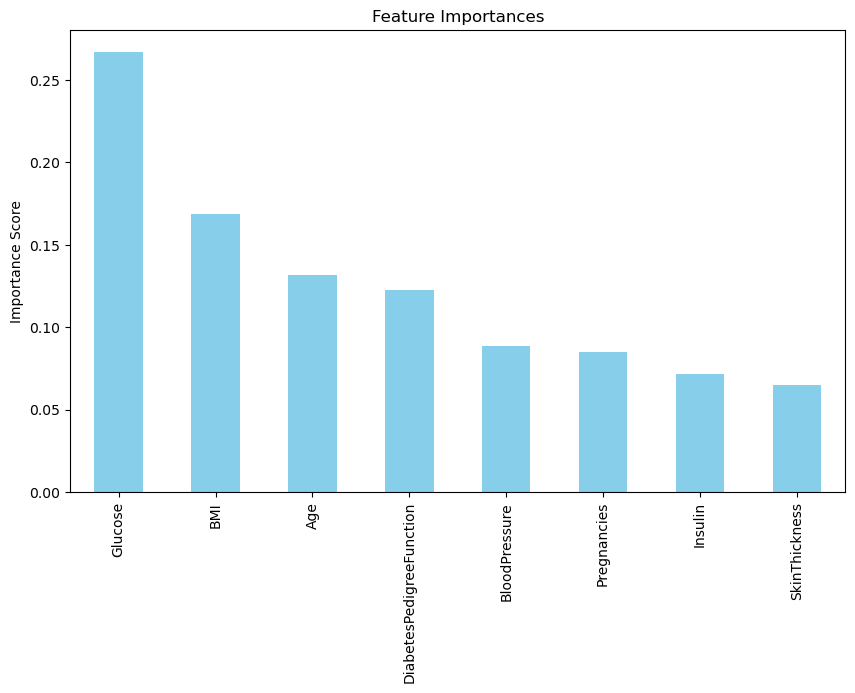

In [34]:
#Feature importance plot using RandomForest
X = data.drop('Outcome', axis=1)
y = data['Outcome']

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='skyblue')
plt.title('Feature Importances')
plt.ylabel('Importance Score')
plt.show()


## Conclusion
**The model achieved an accuracy of 72%**. The confusion matrix shows that the model performs well on most cases but struggles with some false positives/negatives. Further improvement can be achieved by fine-tuning the model or testing other algorithms.